#                                       Predict The Flight Ticket Price

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: 

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [79]:
df_train=pd.read_excel('Data_train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [80]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [81]:
print('The Shape of the Train data:',df_train.shape)
print('The Shape of the Test data:',df_test.shape)

The Shape of the Train data: (10683, 11)
The Shape of the Test data: (2671, 10)


In [82]:
df=df_train.append(df_test,sort=False)
df.head()         

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [83]:
df.tail() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


 In the price column their is a NAN values becoz of the merging the test data into tarin data 

In [84]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

All the data type present in the data set is obejct and the target variable is float datatype

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


## Featur engineering 


 Date of jounery is in string formate  we have to convert int integrer so we have to split the date 

In [86]:
df.Date_of_Journey

0       24/03/2019
1        1/05/2019
2        9/06/2019
3       12/05/2019
4       01/03/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 13354, dtype: object

In [87]:
df['Date_of_Journey'].str.split('/').str[0].head()

0    24
1     1
2     9
3    12
4    01
Name: Date_of_Journey, dtype: object

In [88]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [89]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [90]:
## using lambda Function
#df["Day"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
#df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
#df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])

In [91]:
df['Year']=df['Year'].astype(int)

In [92]:
df['Month']=df['Month'].astype(int)

In [93]:
df['Day']=df['Day'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Day              13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


 Date_of_journey is converted into int data type create new feature day,date,month now drop the feature date_of_jounery

In [95]:
df.drop('Date_of_Journey', axis=1,inplace=True)

In [96]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [97]:
df['Arrival_Time'].str.split(' ').str[0].head()

0    01:10
1    13:15
2    04:25
3    23:30
4    21:35
Name: Arrival_Time, dtype: object

In [98]:
##using lambda
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(" ")[0])
df['Arrival_Time']

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [99]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [100]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Min']=df['Arrival_Time'].str.split(':').str[1]

In [101]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [102]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)

In [103]:
df['Arrival_Min']=df['Arrival_Min'].astype(int)

In [104]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [105]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [106]:
df['Dep_Time'].str.split(':')

0       [22, 20]
1       [05, 50]
2       [09, 25]
3       [18, 05]
4       [16, 50]
          ...   
2666    [20, 30]
2667    [14, 20]
2668    [21, 50]
2669    [04, 00]
2670    [04, 55]
Name: Dep_Time, Length: 13354, dtype: object

In [107]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Hour'].head()

0    22
1    05
2    09
3    18
4    16
Name: Dep_Hour, dtype: object

In [108]:
df['Dep_Min']=df['Dep_Time'].str.split(':').str[1]
df['Dep_Min'].head()

0    20
1    50
2    25
3    05
4    50
Name: Dep_Min, dtype: object

In [109]:
df['Dep_Hour']=df['Dep_Hour'].astype(int)

In [110]:
df['Dep_Min']=df['Dep_Min'].astype(int)

In [111]:
df.drop('Dep_Time',axis=1,inplace=True)

In [112]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Day              13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_Hour     13354 non-null  int32  
 12  Arrival_Min      13354 non-null  int32  
 13  Dep_Hour         13354 non-null  int32  
 14  Dep_Min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [114]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [115]:
df['Route_1']=df['Route'].str.split('→').str[0]
df['Route_2']=df['Route'].str.split('→').str[1]
df['Route_3']=df['Route'].str.split('→').str[2]
df['Route_4']=df['Route'].str.split('→').str[3]
df['Route_5']=df['Route'].str.split('→').str[4]

In [116]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [117]:
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)

In [118]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [119]:
df.drop('Route',axis=1,inplace=True)

In [120]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [121]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [122]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})
df['Total_Stops']

0       0.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
2666    1.0
2667    0.0
2668    1.0
2669    1.0
2670    1.0
Name: Total_Stops, Length: 13354, dtype: float64

In [123]:
df['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [124]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [125]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Day                   0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Min           0
Dep_Hour              0
Dep_Min               0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

In [126]:
df[df['Total_Stops'].isnull()]  


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45,None,None,None,None,None


In [127]:
#df.loc[df['Total_Stops']=='NaN','Total_Stops']= '1'
df['Total_Stops']=df['Total_Stops'].fillna(1)

In [128]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5


In [129]:
df["Total_Stops"].dtype

dtype('float64')

In [130]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [131]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [156]:
##df['Duration'].str.split(' ').str[0].str.split('h').str[0].head()
##df['Duration_Hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
##df['Duration_Hour'].astype(int) ### error becoz theriis some object value in data 
##df[df['Duration']=='5m'] ## Drop This 2 data becoz the duration is 5min so no filght can reach the destination in 5m
##df.drop(6474, axis=0,inplace=True)
##df.drop(2660, axis=0,inplace=True)
##df[df['Duration']=='5m']
##df['Duration_Hour']=df['Duration_Hour'].astype(int)
##df.info()
##df['Duration'].str.split(' ').str[1].str.split('m').str[0].head()
##df['Duration_Min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
##df['Duration_Min'].head()
#df['Duration_Min'].isnull().sum()
#df['Duration_Min']=df['Duration_Min'].fillna(0)
#df['Duration_Min'].isnull().sum()


In [144]:
pd.options.display.max_columns=None
pd.options.display.max_rows=100

In [150]:
df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Day                  int32
Month                int32
Year                 int32
Arrival_Hour         int32
Arrival_Min          int32
Dep_Hour             int32
Dep_Min              int32
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
dtype: object

In [151]:
df.drop('Duration',axis=1,inplace=True)

In [152]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [153]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price              2671
Day                   0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Min           0
Dep_Hour              0
Dep_Min               0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

In [154]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [155]:
df.shape

(13354, 18)

## Covert the Categerical varibale into Numarical

In [159]:
df.select_dtypes(include='object').columns


Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [160]:
print('Ariline Unique:',df['Airline'].unique())
print('Source Unique:',df['Source'].unique())
print('Destination Unique:',df['Destination'].unique())
print('Additinal_Info Unique:',df['Additional_Info'].unique())
print('Route_1 Unique:',df['Route_1'].unique())
print('Route_2 Unique:',df['Route_2'].unique())
print('Route_3 Unique:',df['Route_3'].unique())
print('Route_4 Unique:',df['Route_4'].unique())
print('Route_5 Unique:',df['Route_5'].unique())


Ariline Unique: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source Unique: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination Unique: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additinal_Info Unique: ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
Route_1 Unique: ['BLR ' 'CCU ' 'DEL ' 'MAA ' 'BOM ' 'None']
Route_2 Unique: [' DEL' ' IXR ' ' LKO ' ' NAG ' ' BLR' ' BOM ' ' BLR ' ' CCU' ' AMD '
 ' PNQ ' ' CCU ' ' COK ' ' IDR ' ' GAU ' ' MAA ' ' HYD ' ' COK' ' DEL '
 ' HYD' ' BHO ' ' JAI ' ' ATQ ' ' JDH ' ' BBI ' ' GOI ' ' BDQ ' ' TRV '
 ' IXU ' ' IXB ' ' UDR ' ' RPR ' ' DED ' ' VGA ' ' VNS ' ' IXC ' ' PAT '
 ' JLR ' ' KNU ' ' GWL ' ' VTZ ' ' NDC ' ' IXZ ' ' HBX ' ' IXA ' ' 

In [161]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Airline']= labelencoder.fit_transform(df['Airline'])
df['Source']= labelencoder.fit_transform(df['Source'])
df['Destination']= labelencoder.fit_transform(df['Destination'])
df['Additional_Info']= labelencoder.fit_transform(df['Additional_Info'])
df['Route_1']= labelencoder.fit_transform(df['Route_1'])
df['Route_2']= labelencoder.fit_transform(df['Route_2'])
df['Route_3']= labelencoder.fit_transform(df['Route_3'])
df['Route_4']= labelencoder.fit_transform(df['Route_4'])
df['Route_5']= labelencoder.fit_transform(df['Route_5'])


In [162]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,30,13,5
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,13,5


In [72]:
## Aother Method is OneHotencoder
#from sklearn.preprocessing import OneHotEncoder
#ohe=OneHotEncoder()

In [73]:
#df['Airline']= ohe.fit_transform(df['Airline'])
#df['Source']= ohe.fit_transform(df['Source'])
#df['Destination']= ohe.fit_transform(df['Destination'])
#df['Additional_Info']= ohe.fit_transform(df['Additional_Info'])

In [75]:
df.shape

(13354, 19)

##### Now All categorical varibale converted into numerical Now it is ready for model building

# Model Building

In [163]:
df_test=df[df['Price'].isnull()]
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,1,8,NaN,6,6,2019,4,25,17,30,3,7,6,13,5
1,3,3,0,1,8,NaN,12,5,2019,10,20,6,20,2,33,3,13,5
2,4,2,1,1,5,NaN,21,5,2019,19,0,19,15,3,7,6,13,5
3,6,2,1,1,8,NaN,21,5,2019,21,0,8,0,3,7,6,13,5
4,0,0,2,0,8,NaN,24,6,2019,2,45,23,55,0,13,30,13,5


In [164]:
df_train=df[~df['Price'].isnull()]
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,13,30,13,5
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,34,8,13,5


In [165]:
X=df_train.drop('Price',axis=1)
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,24,3,2019,1,10,22,20,0,13,30,13,5
1,1,3,0,2,8,1,5,2019,13,15,5,50,2,25,1,3,5
2,4,2,1,2,8,9,6,2019,4,25,9,25,3,32,4,5,5
3,3,3,0,1,8,12,5,2019,23,30,18,5,2,34,3,13,5
4,3,0,5,1,8,1,3,2019,21,35,16,50,0,34,8,13,5


In [166]:
y=df_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [167]:
print(X.shape,y.shape)

(10683, 17) (10683,)


In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,r2_score

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [170]:
lr.fit(X_train,y_train)

LinearRegression()

In [171]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7478, 17) (7478,)
(3205, 17) (3205,)


In [172]:
tr_pred=lr.predict(X_train)
ts_pred=lr.predict(X_test)

In [173]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train*100)
print('R_Squared_Test:',R_Squared_Test*100)

Mean_Squared_Error_Train: 10868866.547742857
Mean_Squared_Error_Test: 10449339.05520915
Root_Mean_Squared_Error_Train: 3296.796406777776
Root_Mean_Squared_Error_Test: 3232.5437437425576
R_Squared_Train : 49.23296249387397
R_Squared_Test: 50.02543898085392


<AxesSubplot:xlabel='Price', ylabel='Density'>

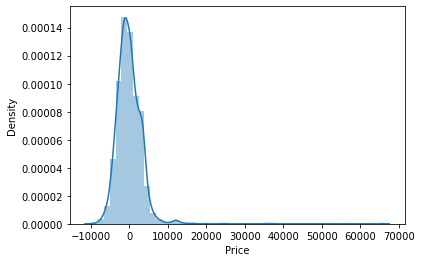

In [174]:
import seaborn as sns

sns.distplot(y_test-ts_pred)

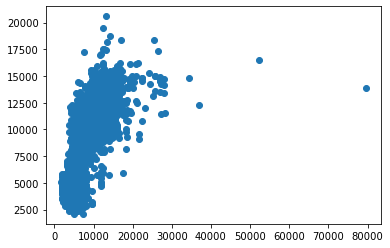

In [175]:


plt.scatter(y_test,ts_pred)

# RandomForest Regressor Model

In [176]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =25 , stop = 50, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [177]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [178]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [179]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)



In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [181]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   4.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  17.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  17.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  19.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  29.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  20.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=15, max_feature

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [182]:
tr_pred=rf_random.predict(X_train)
ts_pred=rf_random.predict(X_test)

In [183]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train*100)
print('R_Squared_Test:',R_Squared_Test*100)

Mean_Squared_Error_Train: 772807.403001507
Mean_Squared_Error_Test: 2226438.4497333793
Root_Mean_Squared_Error_Train: 879.0946496262544
Root_Mean_Squared_Error_Test: 1492.125480558984
R_Squared_Train : 96.39031887631955
R_Squared_Test: 89.3519309141274


<AxesSubplot:xlabel='Price', ylabel='Density'>

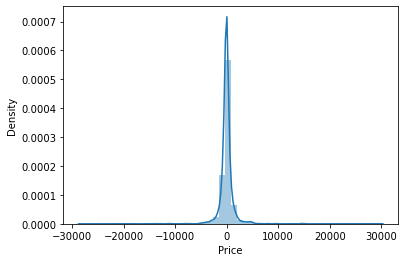

In [184]:
import seaborn as sns

sns.distplot(y_test-ts_pred)

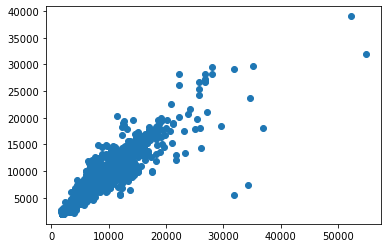

In [523]:
plt.scatter(y_test,ts_pred)